<a href="https://colab.research.google.com/github/Gabbrov/aa/blob/main/Assignment_ml_assignment_airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment

**Dataset**:       AIRLINE SATISFACTION

**Student ID**:    S5513539

**Student Name**:  Gabriel Sorica

## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [739]:
# Data and Datasets
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import DBSCAN

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

In [740]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [741]:
# @title Default title text
import pandas as pd
import math

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/data/airline-satisfaction.csv')

# printing out dataset info

#df.info()
df.head()

,id,gender,customer_type,age,type_of_travel,travel_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,class
0,69571,Female,disloyal Customer,30,Business travel,NaN,2586,2.0,2,2,...,NaN,3,3,4,4,2,4,0.0,NaN,neutral
1,19953,Female,Loyal Customer,66,Personal Travel,Eco,315,NaN,4,3,...,NaN,4,3,3,4,4,4,NaN,26.0,neutral
2,8913,Female,disloyal Customer,39,Business travel,Business,510,NaN,5,5,...,4.0,3,5,4,5,4,4,NaN,NaN,satisfied
3,7655,Female,disloyal Customer,21,Business travel,Business,767,4.0,0,4,...,NaN,3,2,5,3,4,4,15.0,NaN,satisfied
4,100573,Female,Loyal Customer,53,Business travel,NaN,486,NaN,1,1,...,NaN,5,5,5,3,5,4,0.0,0.0,satisfied


                  id           age  flight_distance  inflight_wifi_service  \
count   12988.000000  12988.000000     12988.000000            8643.000000   
mean    65642.274253     39.512242      1220.268325               2.723360   
std     37768.961544     17.384157      1810.431602               1.320076   
min        15.000000      7.000000         6.000000               0.000000   
25%     32866.500000     27.000000       414.000000               2.000000   
50%     66051.500000     40.000000       852.000000               3.000000   
75%     98810.000000     51.000000      1771.000000               4.000000   
max    129865.000000    999.000000    172888.000000               5.000000   

       departure_arrival_time_convenient  ease_of_online_booking  \
count                       12988.000000            12988.000000   
mean                            3.039729                2.740145   
std                             1.529905                1.395689   
min                      

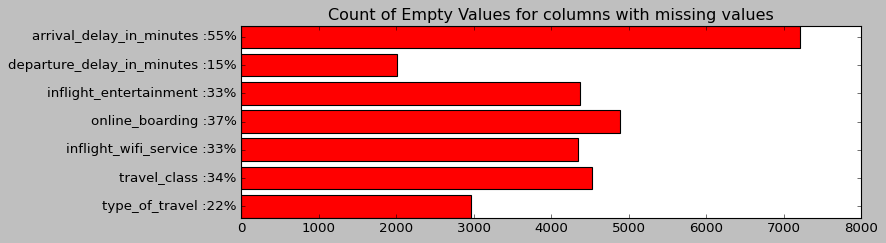

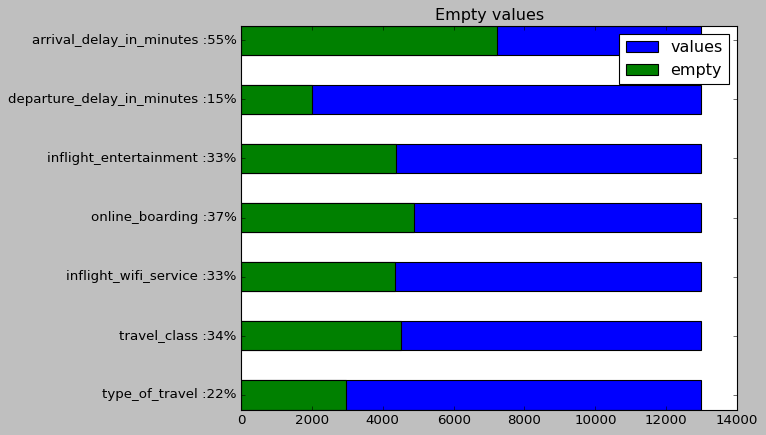

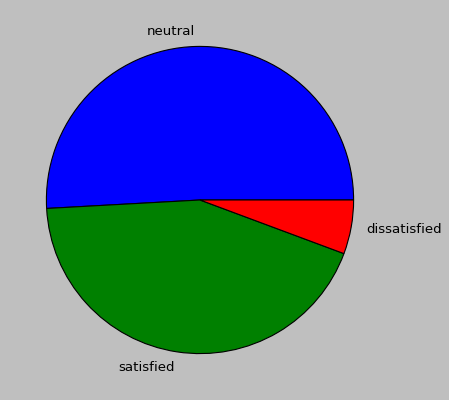

In [742]:
df.head()
#df.info()
print(df.describe())
#---------------------------------------------------------------------------
# Empty values graph


# Replace missing values with "0"



empty = []
empty_name=[]

for clmn in df.columns:
  if df[clmn].isnull().sum() >0 :
    empty_total=len(df[clmn])
    empty.append(df[clmn].isnull().sum())#nr of empty values
    total_percentage=str(math.trunc( (df[clmn].isnull().sum()  / empty_total )*100)  )
    empty_name.append(df[clmn].name+" :"+total_percentage+"%")


  #Plot values
plt.style.use('classic')
plt.figure(figsize=(10, 3))
plt.barh(empty_name, empty, color='red')
plt.title('Count of Empty Values for columns with missing values')



#---------------------------------------------------------------------------
#Stacked Bar graph empty values

fig, plt2 = plt.subplots()
empty_comparison={"values":np.array(empty_total),"empty":np.array(empty)}

for boolean,empty_comparison in empty_comparison.items():
    p = plt2.barh(empty_name,empty_comparison, 0.5, label=boolean)

plt2.set_title("Empty values")
plt2.legend(loc="upper right")
plt.show()


df['departure_delay_in_minutes'].fillna(0, inplace=True)
df['arrival_delay_in_minutes'].fillna(0, inplace=True)
df.drop("travel_class", axis =1)
#print(df.isnull().sum())
#------------------------------------------------------

plt.figure()
df['class'].value_counts().plot(kind="pie", ylabel="")


heat_df = df
heat_df=heat_df.drop(['id','type_of_travel','gender'], axis =1)
heat_df['class'] = pd.to_numeric(heat_df['class'],errors='coerce')

## Exploratory data analysis

Section for exploratory data analysis, to address **Tasks 1.1 and 1.2**.

**OBS:** You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle things like missing values and non-numeric data.

**Create more cells as needed!**

<Axes: >

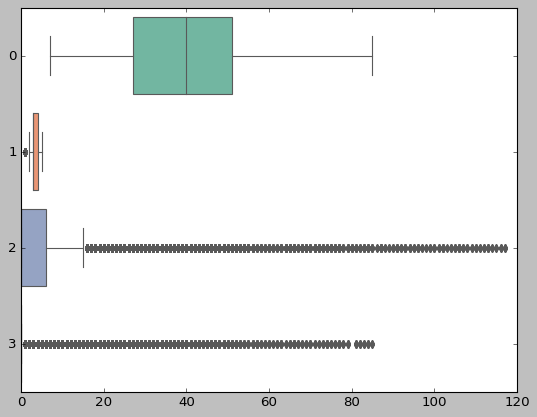

In [743]:
def remove_noise(target=''):
  noise_scores = np.abs((df[target] - df[target].mean()) / df[target].std())
  threshold = 3 #standard deviation treshold(for extreme outliers)
  return(df[target][(noise_scores < threshold)])


flight_box_df=remove_noise('flight_distance')
other_box_df=[remove_noise('age'),remove_noise('checkin_service'),remove_noise('departure_delay_in_minutes'),remove_noise('arrival_delay_in_minutes')]

sns.boxplot(data=other_box_df, orient="h", palette="Set2")
#sns.boxplot(data=flight_box_df, orient="h", palette="Set2")

<ipython-input-744-0a58004cb333>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = heat_df.corr(method='spearman')


<Axes: >

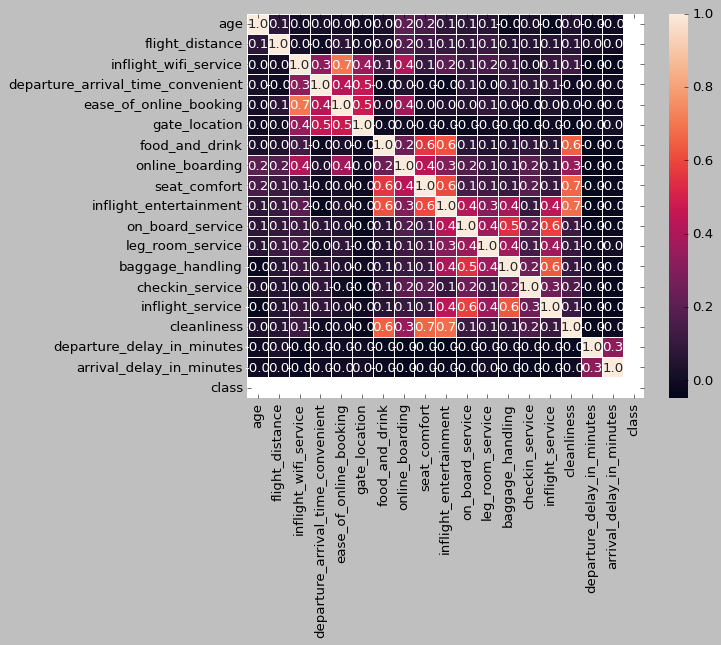

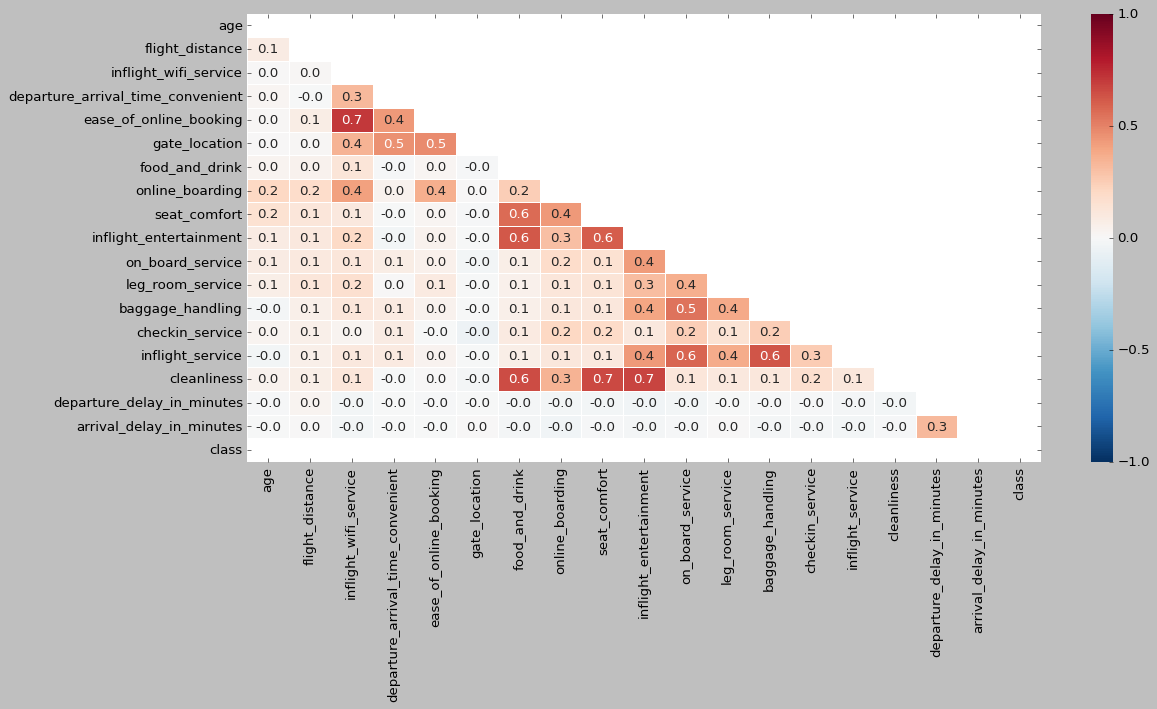

In [744]:
corr = heat_df.corr(method='spearman')
sns.heatmap(data=corr, annot=True, linewidths=.5, fmt= '.1f')


# Getting just the triangle of the correlation matrix
triangle = np.triu(corr)

# Plotting a heatmap with Seaborn
plt.figure(figsize=(16, 7))
sns.heatmap(data=corr, annot=True, mask=triangle, vmin=-1, vmax=1, cmap='RdBu_r', linewidths=.5, fmt= '.1f')

<Axes: ylabel='type_of_travel'>

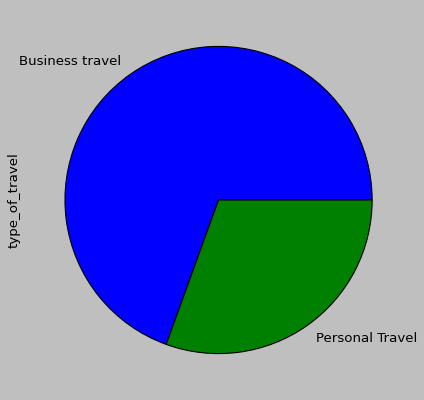

In [745]:
df['type_of_travel'].value_counts().plot(kind='pie', title='')

## Core data pre-processing
Do core data pre-processing here, which is not part of your machine learning experiments.

For example, this may be to convert non-numeric features into numeric ones.

In [746]:
def validate_model(X, y, model, num_runs=1000, test_size=0.2, output=True):
    """
    Performs hold-out validation of a given model on the dataset provided (X, y).
    The default number of runs is 1000, and the default training/test split is 80/20.
    """

    # arrays for storing performance metrics; accuracy, precision and recall
    acc_list = np.array([])
    prec_list = np.array([])
    rec_list = np.array([])

    # capturing the start-time
    start_time = time()

    if output:
        print("Starting model validation")

    # runing `num_runs` number of validation runs of data splitting, training and testing
    for x in range(num_runs):
        # Hold-out validation - default 80% training and 20% testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)

        # Training and testing the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Appending performance metrics to arrays created above
        acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
        prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='macro'))
        rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='macro'))

    # capturing the end-time and printing out
    end_time = time()

    if output:
        print("Completed %d validation runs in %.2f seconds\n" % (num_runs, end_time - start_time))

    return acc_list, prec_list, rec_list


In [747]:
num_runs = 100

In [748]:
result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])

def add_result(model_name, acc_list, prec_list, rec_list):
    """
    Add a result row to a pandas dataframe (created above) for a model with name (model_name).
    mse_list, mae_list and me_list are array lists of performance results from different hold-out validation runs,
    coming from the validate_model() function, above.
    """
    global result_df # doing this to be able to access the gloval dataframe defined above the function

    new_row = {'Model':model_name, 'Accuracy':acc_list.mean(), 'Precision':prec_list.mean(), 'Recall':rec_list.mean()}
    result_df = pd.concat([result_df, pd.Series(new_row).to_frame().T])

    return result_df

def print_results(acc_list, prec_list, rec_list):
    """
    Prints out the mean ACCURACY, PRECISION and RECALL + 2 x standard deviation (STD).
    We multiply the STD by 2 because 95% of the data around the mean is within 2 standard deviations,
    so it gives us a good idea of the range of values around the mean.
    """
    print("ACC:   %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
    print("PREC:  %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
    print("REC:   %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))

def clear_results():
    """
    Clears the result dataframe.
    """
    global result_df
    result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])


## Task 2.1 - ML Workflow to Critically Evaluate

In [767]:

df = df.dropna()


cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category'))
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=None)

In [766]:
# Creating and testing a Logistic Regression Model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out performance of the model
print("Accuracy: %s" % (metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 62.32686980609419


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



# Decision Tree

In [751]:
model = DecisionTreeClassifier()

# defining multiple metrics for scoring
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'prec_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'rec_macro': make_scorer(recall_score, average='macro', zero_division=0)
}

# cross-validation of the model
scores = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator=True)

# Printing results
print("Accuracy:  %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (scores['test_prec_macro'].mean(), scores['test_prec_macro'].std() * 2))
print("Recall:    %0.2f (+/- %0.2f)" % (scores['test_rec_macro'].mean(), scores['test_rec_macro'].std() * 2))

Accuracy:  0.77 (+/- 0.06)
Precision: 0.59 (+/- 0.05)
Recall:    0.59 (+/- 0.06)


# K-Nearest neightbour


In [752]:
k = 10
model = KNeighborsClassifier(n_neighbors=k)

# Hold-out-validation
accuracy_list_knn_sklearn = np.array([])

for x in range(100):
    # Hold-out validation - 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Training and testing the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Appending performance metrics to the accuracy array created above
    accuracy_list_knn_sklearn = np.append(accuracy_list_knn_sklearn, accuracy_score(y_test, y_pred))

print("Accuracy:  %0.2f (+/- %0.2f)" % (accuracy_list_knn_sklearn.mean(), accuracy_list_knn_sklearn.std() * 2))


Accuracy:  0.56 (+/- 0.04)


## Task 2.3 - Evaluation of Improved ML Workflow

Add code for running your **improved** machine learning experiments below.


# Random Forest

In [753]:
model = RandomForestClassifier(n_estimators=40)

# Hold-out validation - default 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Appending performance metrics to arrays created above
# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[  0  44   3]
 [  0 262  15]
 [  0  18 199]]

Accuracy (Testing):  0.85 


In [754]:
def validate_model(X, y, model, num_runs=2000, test_size=0.4, output=True):
    """
    Performs hold-out validation of a given model on the dataset provided (X, y).
    The default number of runs is 1000, and the default training/test split is 80/20.
    """

    # arrays for storing performance metrics; accuracy, precision and recall
    acc_list = np.array([])
    prec_list = np.array([])
    rec_list = np.array([])

    # capturing the start-time
    start_time = time()

    if output:
        print("Starting model validation")

    # runing `num_runs` number of validation runs of data splitting, training and testing
    for x in range(num_runs):
        # Hold-out validation - default 80% training and 20% testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)

        # Training and testing the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Appending performance metrics to arrays created above
        acc_list = np.append(acc_list, accuracy_score(y_test, y_pred))
        prec_list = np.append(prec_list, precision_score(y_test, y_pred, average='macro'))
        rec_list = np.append(rec_list, recall_score(y_test, y_pred, average='macro'))

    # capturing the end-time and printing out
    end_time = time()

    if output:
        print("Completed %d validation runs in %.2f seconds\n" % (num_runs, end_time - start_time))

    return acc_list, prec_list, rec_list

In [755]:
result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])

def add_result(model_name, acc_list, prec_list, rec_list):
    """
    Add a result row to a pandas dataframe (created above) for a model with name (model_name).
    mse_list, mae_list and me_list are array lists of performance results from different hold-out validation runs,
    coming from the validate_model() function, above.
    """
    global result_df # doing this to be able to access the gloval dataframe defined above the function

    new_row = {'Model':model_name, 'Accuracy':acc_list.mean(), 'Precision':prec_list.mean(), 'Recall':rec_list.mean()}
    result_df = pd.concat([result_df, pd.Series(new_row).to_frame().T])

    return result_df

def print_results(acc_list, prec_list, rec_list):
    """
    Prints out the mean ACCURACY, PRECISION and RECALL + 2 x standard deviation (STD).
    We multiply the STD by 2 because 95% of the data around the mean is within 2 standard deviations,
    so it gives us a good idea of the range of values around the mean.
    """
    print("ACC:   %0.2f (+/- %0.2f)" % (acc_list.mean(), acc_list.std() * 2))
    print("PREC:  %0.2f (+/- %0.2f)" % (prec_list.mean(), prec_list.std() * 2))
    print("REC:   %0.2f (+/- %0.2f)" % (rec_list.mean(), rec_list.std() * 2))

def clear_results():
    """
    Clears the result dataframe.
    """
    global result_df
    result_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall'])

In [756]:
# Instantiating model
model = KNeighborsClassifier(n_neighbors=3)

# arrays for storing performance metrics
acc_list, prec_list, rec_list = validate_model(X, y, model, num_runs)

# save the result
add_result('K-NN', acc_list, prec_list, rec_list)

# printing out the performance metrics
print_results(acc_list, prec_list, rec_list)

Starting model validation
Completed 100 validation runs in 7.88 seconds

ACC:   0.49 (+/- 0.03)
PREC:  0.38 (+/- 0.03)
REC:   0.37 (+/- 0.04)
